### _The Battle of Neighborhoods_
# Find the Best Spot to build a warehouse in London

![alt text][logo]

[logo]: https://pngimage.net/wp-content/uploads/2018/06/png-london-1.png "Logo Title Text 2"

### Business Model - Project Charter

London is known by its building rents. The following case study will cover this matter: the best spot for a modern company. Most of the companies rent buildings, it ends up being cheaper, faster and not a permanent decision which gives them flexibility. Although, this case is different and that's why it makes sense to involve a data scientist. Our manager wants to create from its beginning in London ... one that fulfill all their needs. The general location as you saw is already chosen. But there's still a huge job to be done in order to complete the process. Being this a permanent building for the factory, it will be time consuming and expensive, so let's take that into consideration when choosing the best spot. Because after that, there's no way back. They're counting on us.

| Criteria      |        Features    |   |
| ------------- |:-------------:| -----:|
| Security      | Safe |  |
| Environment      | calm, with shops and places to eat, healthy    |   |
| Population | not defined   |    |

### Data Section

In this case study, I will be using the following datasets to help solving the factory's problem 
Let's have a look at them.

  * London Boroughs list: use to check the potential boroughs in London and its features   
  * Foursquare API: to relate the most popular spots in London  
  * London Recorded Crime: To understand the security or lack of security of each zone.  
  
  Let's get started! 
  #### London Recorded Crime:

In [45]:
import pandas as pd
import numpy as np

In [46]:
# Read crime records data
security_lack = pd.read_csv("https://data.london.gov.uk/download/recorded_crime_summary/d2e9ccfc-a054-41e3-89fb-53c2bc3ed87a/MPS%20Borough%20Level%20Crime%20%28most%20recent%2024%20months%29.csv")
security_lack.head()

,MajorText,MinorText,LookUp_BoroughName,201803,201804,201805,201806,201807,201808,201809,...,201905,201906,201907,201908,201909,201910,201911,201912,202001,202002
0,Arson and Criminal Damage,Arson,Barking and Dagenham,6,3,4,12,6,5,3,...,11,3,5,3,6,9,8,6,4,4
1,Arson and Criminal Damage,Criminal Damage,Barking and Dagenham,115,122,126,123,127,101,107,...,138,113,134,118,109,109,99,121,99,98
2,Burglary,Burglary - Business and Community,Barking and Dagenham,38,36,24,33,30,18,33,...,22,27,31,35,37,30,30,25,31,17
3,Burglary,Burglary - Residential,Barking and Dagenham,122,75,93,77,94,84,99,...,114,96,71,67,80,97,114,130,116,121
4,Drug Offences,Drug Trafficking,Barking and Dagenham,7,3,8,6,9,7,10,...,8,6,8,6,6,9,10,2,12,3


In [47]:
security_lack.shape

(1575, 27)

In [48]:
security_lack['LookUp_BoroughName'].unique()

array(['Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley',
       'Camden', 'Croydon', 'Ealing', 'Enfield', 'Greenwich', 'Hackney',
       'Hammersmith and Fulham', 'Haringey', 'Harrow', 'Havering',
       'Hillingdon', 'Hounslow', 'Islington', 'Kensington and Chelsea',
       'Kingston upon Thames', 'Lambeth', 'Lewisham',
       'London Heathrow and London City Airports', 'Merton', 'Newham',
       'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton',
       'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster'],
      dtype=object)

In [49]:
# Create a column for sum of incidents in 24 months
security_lack['Sum'] = security_lack.iloc[:,3:27].sum(axis=1)
security_lacksum = security_lack['Sum']
security_lack.drop(labels=['Sum'], axis=1,inplace = True)
security_lack.insert(3, 'Sum', security_lacksum)
security_lack.head()

,MajorText,MinorText,LookUp_BoroughName,Sum,201803,201804,201805,201806,201807,201808,...,201905,201906,201907,201908,201909,201910,201911,201912,202001,202002
0,Arson and Criminal Damage,Arson,Barking and Dagenham,129,6,3,4,12,6,5,...,11,3,5,3,6,9,8,6,4,4
1,Arson and Criminal Damage,Criminal Damage,Barking and Dagenham,2775,115,122,126,123,127,101,...,138,113,134,118,109,109,99,121,99,98
2,Burglary,Burglary - Business and Community,Barking and Dagenham,726,38,36,24,33,30,18,...,22,27,31,35,37,30,30,25,31,17
3,Burglary,Burglary - Residential,Barking and Dagenham,2430,122,75,93,77,94,84,...,114,96,71,67,80,97,114,130,116,121
4,Drug Offences,Drug Trafficking,Barking and Dagenham,155,7,3,8,6,9,7,...,8,6,8,6,6,9,10,2,12,3


In [50]:
security_lack.columns

Index(['MajorText', 'MinorText', 'LookUp_BoroughName', 'Sum', '201803',
       '201804', '201805', '201806', '201807', '201808', '201809', '201810',
       '201811', '201812', '201901', '201902', '201903', '201904', '201905',
       '201906', '201907', '201908', '201909', '201910', '201911', '201912',
       '202001', '202002'],
      dtype='object')

In [53]:
# Delete unnecessary columns
security_lack.drop(security_lack.columns[0:2], axis=1, inplace=True)
security_lack.drop(security_lack.columns[2:26], axis=1, inplace=True)
security_lack.head()

,LookUp_BoroughName,Sum
0,Barking and Dagenham,129
1,Barking and Dagenham,2775
2,Barking and Dagenham,726
3,Barking and Dagenham,2430
4,Barking and Dagenham,155


In [58]:
# Calculate sum of incidents in the last 24 months by boroughs
security_lack = security_lack.groupby(['LookUp_BoroughName'], as_index=False).sum()
security_lack.head(60)

,LookUp_BoroughName,Sum
0,Barking and Dagenham,38796
1,Barnet,60534
2,Bexley,34099
3,Brent,61154
4,Bromley,48810
5,Camden,76081
6,Croydon,65738
7,Ealing,60811
8,Enfield,59263
9,Greenwich,55330


### With this, we can already confirm that Westminster, Wandsworth and Waltham Forest are the 3 locations with less crimes, which means more security as the manager wanted!

In [59]:
security_lack['Sum'] = security_lack['Sum']/24
security_lack.rename(columns={security_lack.columns[1]:'MonthlyAverageCrimes'}, inplace=True)
security_lack.head(33)

,LookUp_BoroughName,MonthlyAverageCrimes
0,Barking and Dagenham,1616.500000
1,Barnet,2522.250000
2,Bexley,1420.791667
3,Brent,2548.083333
4,Bromley,2033.750000
5,Camden,3170.041667
6,Croydon,2739.083333
7,Ealing,2533.791667
8,Enfield,2469.291667
9,Greenwich,2305.416667


In [61]:
# Explore the clean dataset - borough with most incidents?
security_lack.sort_values(by='MonthlyAverageCrimes', ascending=True).head(32)

,LookUp_BoroughName,MonthlyAverageCrimes
22,London Heathrow and London City Airports,291.541667
26,Richmond upon Thames,1075.791667
19,Kingston upon Thames,1077.416667
28,Sutton,1107.291667
23,Merton,1184.666667
13,Harrow,1370.000000
2,Bexley,1420.791667
14,Havering,1589.541667
0,Barking and Dagenham,1616.500000
11,Hammersmith and Fulham,1924.500000


#### From this data, we can already understand that London Heathrow and London City Airports, Richmond upon Thames and Kingston upon Thames is our top 3 of more secure zones!  
Let's move to the next data source included in this case study.  
#### London Boroughs:

In [87]:
import requests
import lxml
from bs4 import BeautifulSoup

In [88]:
# Obtaining data from Wikipedia
source = requests.get('https://en.wikipedia.org/wiki/List_of_London_boroughs').text
soup = BeautifulSoup(source, 'lxml')
soup.encode("utf-8-sig")

b'\xef\xbb\xbf<!DOCTYPE html>\n<html class="client-nojs" dir="ltr" lang="en">\n<head>\n<meta charset="utf-8-sig"/>\n<title>List of London boroughs - Wikipedia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"XotlpApAEJsAA25HarMAAAAK","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_London_boroughs","wgTitle":"List of London boroughs","wgCurRevisionId":943613985,"wgRevisionId":943613985,"wgArticleId":28092685,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Use dmy dates from August 2015","Use British English from August 2015","Lists of coordinates","Geographic coordinate lists","Ar

In [89]:
LookUp_BoroughName = []
Population = []
Coordinates = []

for row in soup.find('table').find_all('tr'):
    cells = row.find_all('td')
    if len(cells) > 0:
        LookUp_BoroughName.append(cells[0].text.rstrip('\n'))
        Population.append(cells[7].text.rstrip('\n'))
        Coordinates.append(cells[8].text.rstrip('\n'))

In [90]:
# Form a dataframe
dict = {'LookUp_BoroughName' : LookUp_BoroughName,
       'Population' : Population,
       'Coordinates': Coordinates}
info = pd.DataFrame.from_dict(dict)
info.head()

,LookUp_BoroughName,Population,Coordinates
0,Barking and Dagenham [note 1],"194,352",51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E﻿ /...
1,Barnet,"369,088",51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W﻿ /...
2,Bexley,"236,687",51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E﻿ /...
3,Brent,"317,264",51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W﻿ /...
4,Bromley,"317,899",51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E﻿ /...


In [91]:
info['LookUp_BoroughName'] = info['LookUp_BoroughName'].map(lambda x: x.rstrip(']'))
info['LookUp_BoroughName'] = info['LookUp_BoroughName'].map(lambda x: x.rstrip('1234567890.'))
info['LookUp_BoroughName'] = info['LookUp_BoroughName'].str.replace('note','')
info['LookUp_BoroughName'] = info['LookUp_BoroughName'].map(lambda x: x.rstrip(' ['))
info.head()

,LookUp_BoroughName,Population,Coordinates
0,Barking and Dagenham,"194,352",51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E﻿ /...
1,Barnet,"369,088",51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W﻿ /...
2,Bexley,"236,687",51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E﻿ /...
3,Brent,"317,264",51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W﻿ /...
4,Bromley,"317,899",51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E﻿ /...


In [92]:
# Clean coordinates
info[['Coordinates1','Coordinates2','Coordinates3']] = info['Coordinates'].str.split('/',expand=True)
info.head()

,LookUp_BoroughName,Population,Coordinates,Coordinates1,Coordinates2,Coordinates3
0,Barking and Dagenham,"194,352",51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E﻿ /...,51°33′39″N 0°09′21″E﻿,﻿51.5607°N 0.1557°E﻿,51.5607; 0.1557﻿ (Barking and Dagenham)
1,Barnet,"369,088",51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W﻿ /...,51°37′31″N 0°09′06″W﻿,﻿51.6252°N 0.1517°W﻿,51.6252; -0.1517﻿ (Barnet)
2,Bexley,"236,687",51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E﻿ /...,51°27′18″N 0°09′02″E﻿,﻿51.4549°N 0.1505°E﻿,51.4549; 0.1505﻿ (Bexley)
3,Brent,"317,264",51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W﻿ /...,51°33′32″N 0°16′54″W﻿,﻿51.5588°N 0.2817°W﻿,51.5588; -0.2817﻿ (Brent)
4,Bromley,"317,899",51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E﻿ /...,51°24′14″N 0°01′11″E﻿,﻿51.4039°N 0.0198°E﻿,51.4039; 0.0198﻿ (Bromley)


In [93]:
info.drop(labels=['Coordinates','Coordinates1','Coordinates2'], axis=1,inplace = True)
info[['Latitude','Longitude']] = info['Coordinates3'].str.split(';',expand=True)
info.head()

,LookUp_BoroughName,Population,Coordinates3,Latitude,Longitude
0,Barking and Dagenham,"194,352",51.5607; 0.1557﻿ (Barking and Dagenham),51.5607,0.1557﻿ (Barking and Dagenham)
1,Barnet,"369,088",51.6252; -0.1517﻿ (Barnet),51.6252,-0.1517﻿ (Barnet)
2,Bexley,"236,687",51.4549; 0.1505﻿ (Bexley),51.4549,0.1505﻿ (Bexley)
3,Brent,"317,264",51.5588; -0.2817﻿ (Brent),51.5588,-0.2817﻿ (Brent)
4,Bromley,"317,899",51.4039; 0.0198﻿ (Bromley),51.4039,0.0198﻿ (Bromley)


In [94]:
info.drop(labels=['Coordinates3'], axis=1,inplace = True)
info['Latitude'] = info['Latitude'].map(lambda x: x.rstrip(u'\ufeff'))
info['Latitude'] = info['Latitude'].map(lambda x: x.lstrip())
info['Longitude'] = info['Longitude'].map(lambda x: x.rstrip(')'))
info['Longitude'] = info['Longitude'].map(lambda x: x.rstrip('abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ '))
info['Longitude'] = info['Longitude'].map(lambda x: x.rstrip(' ('))
info['Longitude'] = info['Longitude'].map(lambda x: x.rstrip(u'\ufeff'))
info['Longitude'] = info['Longitude'].map(lambda x: x.lstrip())
info['Population'] = info['Population'].str.replace(',','')
info.head()

,LookUp_BoroughName,Population,Latitude,Longitude
0,Barking and Dagenham,194352,51.5607,0.1557
1,Barnet,369088,51.6252,-0.1517
2,Bexley,236687,51.4549,0.1505
3,Brent,317264,51.5588,-0.2817
4,Bromley,317899,51.4039,0.0198


In [83]:

info['LookUp_BoroughName'].unique()

array(['Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley',
       'Camden', 'Croydon', 'Ealing', 'Enfield', 'Greenwich', 'Hackney',
       'Hammersmith and Fulham', 'Haringey', 'Harrow', 'Havering',
       'Hillingdon', 'Hounslow', 'Islington', 'Kensington and Chelsea',
       'Kingston upon Thames', 'Lambeth', 'Lewisham', 'Merton', 'Newham',
       'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton',
       'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster'],
      dtype=object)

In [97]:

info.head(32)

,LookUp_BoroughName,Population,Latitude,Longitude
0,Barking and Dagenham,194352,51.5607,0.1557
1,Barnet,369088,51.6252,-0.1517
2,Bexley,236687,51.4549,0.1505
3,Brent,317264,51.5588,-0.2817
4,Bromley,317899,51.4039,0.0198
5,Camden,229719,51.5290,-0.1255
6,Croydon,372752,51.3714,-0.0977
7,Ealing,342494,51.5130,-0.3089
8,Enfield,320524,51.6538,-0.0799
9,Greenwich,264008,51.4892,0.0648


From this data, we can confirm that the 3 areas with less population are Kensington and Chelsea, Kingston upon Thames and Hammersmith and Fulham.  
Let's move to the next data source.  
  #### Foursquare API:

In [98]:
CLIENT_ID = 'E25QZTZUZE0102UJFUHOFF333M5OX1SLNZMPANG5L2EUAJ54' 
CLIENT_SECRET = '4U1WXJSRPSZXDAFCVLTPRFXAF24W3XXJLBVPSKVA2IQIELYA' 
VERSION = '20180604'

In [100]:
#Create a function to explore all borough
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['LookUp_BoroughName', 
                  'LookUp_Borough Latitude', 
                  'LookUp_Borough Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
        
    return(nearby_venues)

In [101]:
#Get top 50 venues in 500m radius of the center of each Borough
LIMIT = 50
venues = getNearbyVenues(names=info['LookUp_BoroughName'],
                                   latitudes=info['Latitude'],
                                   longitudes=info['Longitude']
                                  )

Barking and Dagenham
Barnet
Bexley
Brent
Bromley
Camden
Croydon
Ealing
Enfield
Greenwich
Hackney
Hammersmith and Fulham
Haringey
Harrow
Havering
Hillingdon
Hounslow
Islington
Kensington and Chelsea
Kingston upon Thames
Lambeth
Lewisham
Merton
Newham
Redbridge
Richmond upon Thames
Southwark
Sutton
Tower Hamlets
Waltham Forest
Wandsworth
Westminster


In [102]:
print(venues.shape)
venues.head()

(1142, 7)


,LookUp_BoroughName,LookUp_Borough Latitude,LookUp_Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Barking and Dagenham,51.5607,0.1557,Central Park,51.559560,0.161981,Park
1,Barking and Dagenham,51.5607,0.1557,Crowlands Heath Golf Course,51.562457,0.155818,Golf Course
2,Barking and Dagenham,51.5607,0.1557,Robert Clack Leisure Centre,51.560808,0.152704,Martial Arts Dojo
3,Barking and Dagenham,51.5607,0.1557,Morrisons,51.559774,0.148752,Supermarket
4,Barking and Dagenham,51.5607,0.1557,Becontree Heath Bus Station,51.561065,0.150998,Bus Station


## Methodology

In this part, let's explore the data previously cleansed and prepared! Then, we will conduct cluster analysis to classify the boroughs into different levels of preference.

#### Exploratory Data Analysis (EDA)

In [103]:
#Review our data
security_lack.head()

,LookUp_BoroughName,MonthlyAverageCrimes
0,Barking and Dagenham,1616.500000
1,Barnet,2522.250000
2,Bexley,1420.791667
3,Brent,2548.083333
4,Bromley,2033.750000


In [104]:
info.head()

,LookUp_BoroughName,Population,Latitude,Longitude
0,Barking and Dagenham,194352,51.5607,0.1557
1,Barnet,369088,51.6252,-0.1517
2,Bexley,236687,51.4549,0.1505
3,Brent,317264,51.5588,-0.2817
4,Bromley,317899,51.4039,0.0198


In [105]:
venues.head()

,LookUp_BoroughName,LookUp_Borough Latitude,LookUp_Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Barking and Dagenham,51.5607,0.1557,Central Park,51.559560,0.161981,Park
1,Barking and Dagenham,51.5607,0.1557,Crowlands Heath Golf Course,51.562457,0.155818,Golf Course
2,Barking and Dagenham,51.5607,0.1557,Robert Clack Leisure Centre,51.560808,0.152704,Martial Arts Dojo
3,Barking and Dagenham,51.5607,0.1557,Morrisons,51.559774,0.148752,Supermarket
4,Barking and Dagenham,51.5607,0.1557,Becontree Heath Bus Station,51.561065,0.150998,Bus Station


In [106]:
import matplotlib.pyplot as plt

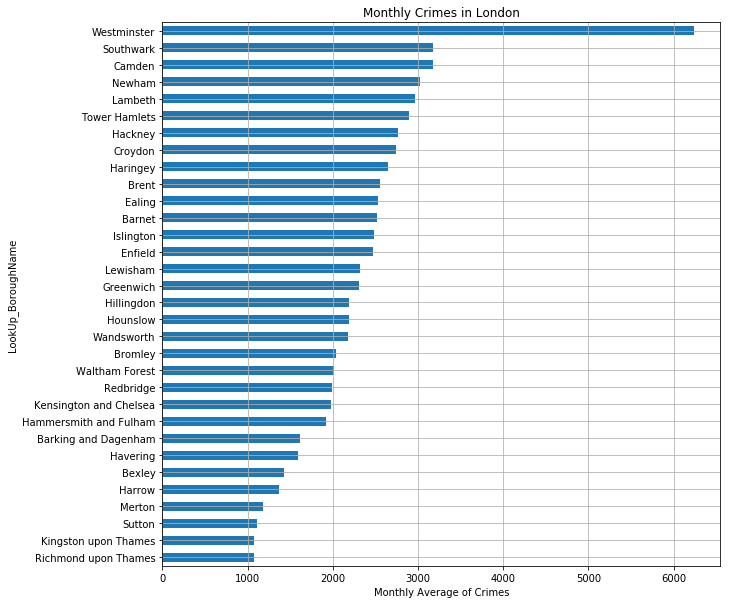

In [155]:
#Visualize crime data
security_lack.set_index('LookUp_BoroughName')['MonthlyAverageCrimes'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.xlabel('Monthly Average of Crimes')
plt.title('Monthly Crimes in London')
plt.show()

In [108]:

#Drop Heathrow Airport as it is not a residential area & not included in population data
security_lack.drop([22], inplace=True)

In [109]:

#Combine crime data and borough information data
df = pd.merge(security_lack,info, how='outer', on='LookUp_BoroughName')
df.head()

,LookUp_BoroughName,MonthlyAverageCrimes,Population,Latitude,Longitude
0,Barking and Dagenham,1616.500000,194352,51.5607,0.1557
1,Barnet,2522.250000,369088,51.6252,-0.1517
2,Bexley,1420.791667,236687,51.4549,0.1505
3,Brent,2548.083333,317264,51.5588,-0.2817
4,Bromley,2033.750000,317899,51.4039,0.0198


In [110]:
#Check data type
df.dtypes

LookUp_BoroughName       object
MonthlyAverageCrimes    float64
Population               object
Latitude                 object
Longitude                object
dtype: object

In [111]:
df['Population'] = pd.to_numeric(df['Population'])
df['Latitude'] = pd.to_numeric(df['Latitude'])
df['Longitude'] = pd.to_numeric(df['Longitude'])
df.dtypes

LookUp_BoroughName       object
MonthlyAverageCrimes    float64
Population                int64
Latitude                float64
Longitude               float64
dtype: object

In [112]:

df.shape

(32, 5)

In [114]:
#Create a column that shows the number of crimes per 1000 people per month
df['Population'].astype(float)
df['CrimeToPop'] = df['MonthlyAverageCrimes'] / df['Population'] * 1000
df.head()

,LookUp_BoroughName,MonthlyAverageCrimes,Population,Latitude,Longitude,CrimeToPop
0,Barking and Dagenham,1616.500000,194352,51.5607,0.1557,8.317383
1,Barnet,2522.250000,369088,51.6252,-0.1517,6.833736
2,Bexley,1420.791667,236687,51.4549,0.1505,6.002829
3,Brent,2548.083333,317264,51.5588,-0.2817,8.031429
4,Bromley,2033.750000,317899,51.4039,0.0198,6.397472


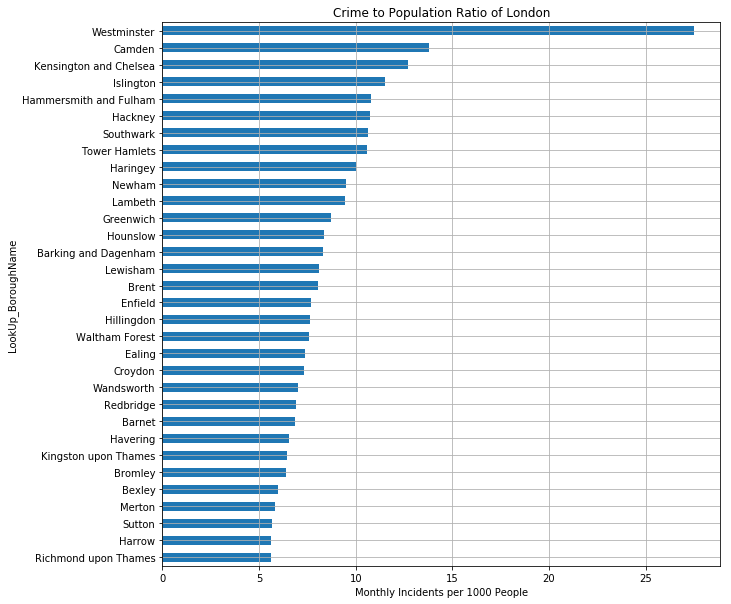

In [115]:
#Visualize crime per 1000 people
df.set_index('LookUp_BoroughName')['CrimeToPop'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.xlabel('Monthly Incidents per 1000 People')
plt.title('Crime to Population Ratio of London')
plt.show()

In [117]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium
from geopy.geocoders import Nominatim

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    branca-0.4.0               |             py_0          26 KB  conda-forge
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    openssl-1.1.1f             |       h516909a_0         2.1 MB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ------------------------------------------------------------
                       

In [119]:
#Get coordinates of London
address = 'London, UK'

geolocator = Nominatim(user_agent="explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of London are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of London are 51.5073219, -0.1276474.


In [120]:
# make a map of London using folium
map = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, borough in zip(df['Latitude'], df['Longitude'], df['LookUp_BoroughName']):
    label = '{}'.format(borough)
    label2 = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label2,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map)  
    
map

Area with more crimes

#### Cluster Analysis

In [121]:
print('There are {} uniques categories.'.format(len(venues['Venue Category'].unique())))

There are 181 uniques categories.


In [122]:
# One hot encoding before clustering
onehot = pd.get_dummies(venues[['Venue Category']], prefix="", prefix_sep="")

In [123]:
# Add borough name back to dataframe
borough = venues['LookUp_BoroughName']
onehot.insert(0, 'LookUp_BoroughName', borough)
onehot.head()

,LookUp_BoroughName,African Restaurant,Airport,Airport Lounge,Airport Service,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,...,Used Bookstore,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio
0,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [124]:
onehot.shape

(1142, 182)

In [125]:
# Group rows by borough and take the mean of frequency of each venue category
grouped = onehot.groupby('LookUp_BoroughName').mean().reset_index()
grouped

,LookUp_BoroughName,African Restaurant,Airport,Airport Lounge,Airport Service,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,...,Used Bookstore,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio
0,Barking and Dagenham,0.00000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,...,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.000000
1,Barnet,0.00000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,...,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.000000
2,Bexley,0.00000,0.000000,0.000000,0.000000,0.033333,0.00,0.000000,0.000000,0.00,...,0.00,0.000000,0.033333,0.000000,0.033333,0.00,0.00,0.00,0.00,0.000000
3,Brent,0.00000,0.000000,0.000000,0.000000,0.040000,0.00,0.000000,0.000000,0.00,...,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.000000
4,Bromley,0.00000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,...,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.000000
5,Camden,0.00000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,...,0.02,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.000000
6,Croydon,0.00000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,...,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.000000
7,Ealing,0.00000,0.000000,0.000000,0.000000,0.000000,0.00,0.020000,0.000000,0.00,...,0.00,0.000000,0.020000,0.040000,0.000000,0.02,0.00,0.00,0.00,0.000000
8,Enfield,0.00000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,...,0.00,0.000000,0.020000,0.000000,0.000000,0.00,0.00,0.00,0.02,0.000000
9,Greenwich,0.02439,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,...,0.00,0.000000,0.000000,0.024390,0.024390,0.00,0.00,0.00,0.00,0.000000


In [126]:
# top 5 venues for each neighborhood
num_top_venues = 5

for hood in grouped['LookUp_BoroughName']:
    print("----"+hood+"----")
    temp = grouped[grouped['LookUp_BoroughName'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Barking and Dagenham----
               venue  freq
0        Bus Station  0.14
1               Pool  0.14
2        Supermarket  0.14
3        Golf Course  0.14
4  Martial Arts Dojo  0.14


----Barnet----
                venue  freq
0                Café  0.67
1            Bus Stop  0.33
2  African Restaurant  0.00
3    Pedestrian Plaza  0.00
4        Optical Shop  0.00


----Bexley----
                  venue  freq
0                   Pub  0.10
1           Coffee Shop  0.10
2        Clothing Store  0.10
3    Italian Restaurant  0.07
4  Fast Food Restaurant  0.07


----Brent----
                 venue  freq
0          Coffee Shop  0.12
1                Hotel  0.10
2  Sporting Goods Shop  0.06
3       Clothing Store  0.06
4        Grocery Store  0.06


----Bromley----
                  venue  freq
0        Clothing Store  0.15
1           Coffee Shop  0.12
2          Burger Joint  0.05
3  Gym / Fitness Center  0.05
4           Pizza Place  0.05


----Camden----
            venue  fre

In [127]:
# Put into pandas dataframe
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['LookUp_BoroughName']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
venues_sorted = pd.DataFrame(columns=columns)
venues_sorted['LookUp_BoroughName'] = grouped['LookUp_BoroughName']

for ind in np.arange(grouped.shape[0]):
    venues_sorted.iloc[ind, 1:] = return_most_common_venues(grouped.iloc[ind, :], num_top_venues)

venues_sorted.head()

,LookUp_BoroughName,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,Pool,Bus Station,Supermarket,Gym / Fitness Center,Park,Golf Course,Martial Arts Dojo,Dumpling Restaurant,Fish & Chips Shop,Film Studio
1,Barnet,Café,Bus Stop,Yoga Studio,English Restaurant,Food Court,Flea Market,Fish Market,Fish & Chips Shop,Film Studio,Fast Food Restaurant
2,Bexley,Coffee Shop,Clothing Store,Pub,Italian Restaurant,Supermarket,Fast Food Restaurant,Pharmacy,Hotel,Grocery Store,Furniture / Home Store
3,Brent,Coffee Shop,Hotel,Grocery Store,Clothing Store,Sporting Goods Shop,American Restaurant,Sandwich Place,Bar,Pizza Place,Café
4,Bromley,Clothing Store,Coffee Shop,Pizza Place,Burger Joint,Gym / Fitness Center,Bar,Cosmetics Shop,Burrito Place,Café,Sandwich Place


In [128]:
# K Means Clustering
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

In [130]:
kclusters = 5
london_cluster = grouped.drop('LookUp_BoroughName', 1)
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(london_cluster)

kmeans.labels_[0:10]

array([1, 2, 3, 1, 3, 1, 1, 1, 3, 3], dtype=int32)

In [131]:
# add clustering labels
venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

# merge toronto_grouped with toronto coords to add latitude/longitude for each neighborhood
london_merged = df
london_merged = london_merged.join(venues_sorted.set_index('LookUp_BoroughName'), on='LookUp_BoroughName')

london_merged.head()

,LookUp_BoroughName,MonthlyAverageCrimes,Population,Latitude,Longitude,CrimeToPop,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,1616.500000,194352,51.5607,0.1557,8.317383,1,Pool,Bus Station,Supermarket,Gym / Fitness Center,Park,Golf Course,Martial Arts Dojo,Dumpling Restaurant,Fish & Chips Shop,Film Studio
1,Barnet,2522.250000,369088,51.6252,-0.1517,6.833736,2,Café,Bus Stop,Yoga Studio,English Restaurant,Food Court,Flea Market,Fish Market,Fish & Chips Shop,Film Studio,Fast Food Restaurant
2,Bexley,1420.791667,236687,51.4549,0.1505,6.002829,3,Coffee Shop,Clothing Store,Pub,Italian Restaurant,Supermarket,Fast Food Restaurant,Pharmacy,Hotel,Grocery Store,Furniture / Home Store
3,Brent,2548.083333,317264,51.5588,-0.2817,8.031429,1,Coffee Shop,Hotel,Grocery Store,Clothing Store,Sporting Goods Shop,American Restaurant,Sandwich Place,Bar,Pizza Place,Café
4,Bromley,2033.750000,317899,51.4039,0.0198,6.397472,3,Clothing Store,Coffee Shop,Pizza Place,Burger Joint,Gym / Fitness Center,Bar,Cosmetics Shop,Burrito Place,Café,Sandwich Place


In [132]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=9)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(london_merged['Latitude'], london_merged['Longitude'], london_merged['LookUp_BoroughName'], london_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [133]:
# Cluster 0: Healthy area
london_merged.loc[london_merged['Cluster Labels'] == 0, london_merged.columns[[0] + list(range(5, london_merged.shape[1]))]]

,LookUp_BoroughName,CrimeToPop,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
16,Hounslow,8.352959,0,Café,Bed & Breakfast,Chinese Restaurant,Park,Metro Station,Yoga Studio,English Restaurant,Flea Market,Fish Market,Fish & Chips Shop


In [134]:

# Cluster 1: Lively area (Pubs, Restaurants)
london_merged.loc[london_merged['Cluster Labels'] == 1, london_merged.columns[[0] + list(range(5, london_merged.shape[1]))]]

,LookUp_BoroughName,CrimeToPop,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,8.317383,1,Pool,Bus Station,Supermarket,Gym / Fitness Center,Park,Golf Course,Martial Arts Dojo,Dumpling Restaurant,Fish & Chips Shop,Film Studio
3,Brent,8.031429,1,Coffee Shop,Hotel,Grocery Store,Clothing Store,Sporting Goods Shop,American Restaurant,Sandwich Place,Bar,Pizza Place,Café
5,Camden,13.799649,1,Café,Coffee Shop,Hotel,Bakery,Breakfast Spot,Burger Joint,Pizza Place,Train Station,Deli / Bodega,Italian Restaurant
6,Croydon,7.348273,1,Coffee Shop,Pub,Portuguese Restaurant,Asian Restaurant,Nightclub,Burger Joint,Burrito Place,Café,Caribbean Restaurant,Restaurant
7,Ealing,7.398061,1,Coffee Shop,Italian Restaurant,Bakery,Hotel,Burger Joint,Vietnamese Restaurant,Park,Pizza Place,Bar,Pub
10,Hackney,10.737084,1,Pub,Cocktail Bar,Coffee Shop,Café,Bakery,Clothing Store,Brewery,Grocery Store,Vietnamese Restaurant,Movie Theater
12,Haringey,10.036600,1,Fast Food Restaurant,Italian Restaurant,Supermarket,Hotel Bar,Gym / Fitness Center,Grocery Store,Light Rail Station,Mediterranean Restaurant,Park,Convenience Store
17,Islington,11.503073,1,Pub,Bakery,Music Venue,Coffee Shop,Burger Joint,Theater,Boutique,Ice Cream Shop,Cocktail Bar,Hobby Shop
18,Kensington and Chelsea,12.724623,1,Café,Bakery,Restaurant,Juice Bar,Clothing Store,Burger Joint,Gym / Fitness Center,English Restaurant,Grocery Store,French Restaurant
19,Kingston upon Thames,6.459604,1,Coffee Shop,Café,Department Store,Burger Joint,Italian Restaurant,Sushi Restaurant,Pub,Thai Restaurant,Cajun / Creole Restaurant,Furniture / Home Store


In [135]:
london_merged.loc[london_merged['Cluster Labels'] == 2, london_merged.columns[[0] + list(range(5, london_merged.shape[1]))]]

,LookUp_BoroughName,CrimeToPop,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Barnet,6.833736,2,Café,Bus Stop,Yoga Studio,English Restaurant,Food Court,Flea Market,Fish Market,Fish & Chips Shop,Film Studio,Fast Food Restaurant


In [136]:
london_merged.loc[london_merged['Cluster Labels'] == 3, london_merged.columns[[0] + list(range(5, london_merged.shape[1]))]]

,LookUp_BoroughName,CrimeToPop,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Bexley,6.002829,3,Coffee Shop,Clothing Store,Pub,Italian Restaurant,Supermarket,Fast Food Restaurant,Pharmacy,Hotel,Grocery Store,Furniture / Home Store
4,Bromley,6.397472,3,Clothing Store,Coffee Shop,Pizza Place,Burger Joint,Gym / Fitness Center,Bar,Cosmetics Shop,Burrito Place,Café,Sandwich Place
8,Enfield,7.703921,3,Clothing Store,Coffee Shop,Pub,Turkish Restaurant,Optical Shop,Department Store,Pharmacy,Bookstore,Shopping Mall,Sandwich Place
9,Greenwich,8.732374,3,Clothing Store,Supermarket,Fast Food Restaurant,Coffee Shop,Pub,Grocery Store,Pharmacy,Plaza,Sandwich Place,Hotel
11,Hammersmith and Fulham,10.770350,3,Pub,Italian Restaurant,Indian Restaurant,Gastropub,Café,Japanese Restaurant,Clothing Store,Persian Restaurant,Chinese Restaurant,Portuguese Restaurant
13,Harrow,5.629242,3,Indie Movie Theater,Indian Restaurant,Coffee Shop,Platform,Supermarket,Fast Food Restaurant,Grocery Store,Dumpling Restaurant,Fish Market,Fish & Chips Shop
14,Havering,6.566183,3,Clothing Store,Coffee Shop,Hotel,Shopping Mall,Pub,Fast Food Restaurant,Café,Bookstore,Bakery,Sandwich Place
15,Hillingdon,7.651368,3,Coffee Shop,Clothing Store,Italian Restaurant,Pharmacy,Burger Joint,Pizza Place,Sandwich Place,Supermarket,Toy / Game Store,Fast Food Restaurant
21,Lewisham,8.110717,3,Grocery Store,Supermarket,Italian Restaurant,Platform,Coffee Shop,Train Station,Shopping Mall,Sandwich Place,Pub,Portuguese Restaurant
24,Redbridge,6.912453,3,Clothing Store,Fast Food Restaurant,Hotel,Grocery Store,Supermarket,Sandwich Place,Bakery,Coffee Shop,Pub,Gym / Fitness Center


In [137]:
# Cluster 4: Traveller area
london_merged.loc[london_merged['Cluster Labels'] == 4, london_merged.columns[[0] + list(range(5, london_merged.shape[1]))]]

,LookUp_BoroughName,CrimeToPop,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
23,Newham,9.493485,4,Hotel,Airport Service,Sandwich Place,Airport,Airport Lounge,Pharmacy,Rafting,Chinese Restaurant,Yoga Studio,Fish Market


### Results and Discussion

#### Security

In [138]:
crimetopop = london_merged['CrimeToPop']
london_merged.drop(['CrimeToPop'], inplace=True, axis=1)
london_merged.insert(1, 'CrimeToPop', crimetopop)
london_merged.sort_values(by='CrimeToPop', ascending = False)

,LookUp_BoroughName,CrimeToPop,MonthlyAverageCrimes,Population,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
31,Westminster,27.503479,6238.916667,226841,51.4973,-0.1372,1,Hotel,Coffee Shop,Theater,Sandwich Place,Sushi Restaurant,Hotel Bar,Juice Bar,Sporting Goods Shop,Pedestrian Plaza,Breakfast Spot
5,Camden,13.799649,3170.041667,229719,51.5290,-0.1255,1,Café,Coffee Shop,Hotel,Bakery,Breakfast Spot,Burger Joint,Pizza Place,Train Station,Deli / Bodega,Italian Restaurant
18,Kensington and Chelsea,12.724623,1979.875000,155594,51.5020,-0.1947,1,Café,Bakery,Restaurant,Juice Bar,Clothing Store,Burger Joint,Gym / Fitness Center,English Restaurant,Grocery Store,French Restaurant
17,Islington,11.503073,2480.833333,215667,51.5416,-0.1022,1,Pub,Bakery,Music Venue,Coffee Shop,Burger Joint,Theater,Boutique,Ice Cream Shop,Cocktail Bar,Hobby Shop
11,Hammersmith and Fulham,10.770350,1924.500000,178685,51.4927,-0.2339,3,Pub,Italian Restaurant,Indian Restaurant,Gastropub,Café,Japanese Restaurant,Clothing Store,Persian Restaurant,Chinese Restaurant,Portuguese Restaurant
10,Hackney,10.737084,2763.500000,257379,51.5450,-0.0553,1,Pub,Cocktail Bar,Coffee Shop,Café,Bakery,Clothing Store,Brewery,Grocery Store,Vietnamese Restaurant,Movie Theater
26,Southwark,10.630679,3172.875000,298464,51.5035,-0.0804,1,Coffee Shop,Hotel,Cocktail Bar,Hotel Bar,Indian Restaurant,Pub,Art Gallery,English Restaurant,Pizza Place,Bar
28,Tower Hamlets,10.604395,2893.833333,272890,51.5099,-0.0059,1,Italian Restaurant,Hotel,Coffee Shop,Gym / Fitness Center,Chinese Restaurant,Pizza Place,Convenience Store,Grocery Store,Sandwich Place,Café
12,Haringey,10.036600,2643.500000,263386,51.6000,-0.1119,1,Fast Food Restaurant,Italian Restaurant,Supermarket,Hotel Bar,Gym / Fitness Center,Grocery Store,Light Rail Station,Mediterranean Restaurant,Park,Convenience Store
23,Newham,9.493485,3021.083333,318227,51.5077,0.0469,4,Hotel,Airport Service,Sandwich Place,Airport,Airport Lounge,Pharmacy,Rafting,Chinese Restaurant,Yoga Studio,Fish Market


#### Environment

In [141]:
london_merged.loc[london_merged['Cluster Labels'] == 0].LookUp_BoroughName.unique()

array(['Hounslow'], dtype=object)

In [142]:
london_merged.loc[london_merged['Cluster Labels'] == 1].LookUp_BoroughName.unique()

array(['Barking and Dagenham', 'Brent', 'Camden', 'Croydon', 'Ealing',
       'Hackney', 'Haringey', 'Islington', 'Kensington and Chelsea',
       'Kingston upon Thames', 'Lambeth', 'Merton', 'Southwark',
       'Tower Hamlets', 'Waltham Forest', 'Westminster'], dtype=object)

In [143]:
london_merged.loc[london_merged['Cluster Labels'] == 2].LookUp_BoroughName.unique()

array(['Barnet'], dtype=object)

In [144]:
london_merged.loc[london_merged['Cluster Labels'] == 3].LookUp_BoroughName.unique()

array(['Bexley', 'Bromley', 'Enfield', 'Greenwich',
       'Hammersmith and Fulham', 'Harrow', 'Havering', 'Hillingdon',
       'Lewisham', 'Redbridge', 'Richmond upon Thames', 'Sutton',
       'Wandsworth'], dtype=object)

In [145]:
london_merged.loc[london_merged['Cluster Labels'] == 4].LookUp_BoroughName.unique()

array(['Newham'], dtype=object)

#### Final Score

In [146]:
score = london_merged[['LookUp_BoroughName','CrimeToPop','Cluster Labels']].copy()
score.head()

,LookUp_BoroughName,CrimeToPop,Cluster Labels
0,Barking and Dagenham,8.317383,1
1,Barnet,6.833736,2
2,Bexley,6.002829,3
3,Brent,8.031429,1
4,Bromley,6.397472,3


In [147]:
score['Safety'] = (score['CrimeToPop']-score['CrimeToPop'].min())/(score['CrimeToPop'].max()-score['CrimeToPop'].min())
score['Safety'] = (score['Safety'] - 1) * -1
score.head()

,LookUp_BoroughName,CrimeToPop,Cluster Labels,Safety
0,Barking and Dagenham,8.317383,1,0.876806
1,Barnet,6.833736,2,0.944609
2,Bexley,6.002829,3,0.982581
3,Brent,8.031429,1,0.889874
4,Bromley,6.397472,3,0.964546


In [148]:
score['Atmosphere'] = 0
score.head()

,LookUp_BoroughName,CrimeToPop,Cluster Labels,Safety,Atmosphere
0,Barking and Dagenham,8.317383,1,0.876806,0
1,Barnet,6.833736,2,0.944609,0
2,Bexley,6.002829,3,0.982581,0
3,Brent,8.031429,1,0.889874,0
4,Bromley,6.397472,3,0.964546,0


In [149]:
for i in range(32):
    if score.iloc[i,2] == 2:
        score.iloc[i,4] = 1
    elif score.iloc[i,2] == 1:
        score.iloc[i,4] = 0.9
    elif score.iloc[i,2] == 0:
        score.iloc[i,2] = 0.8
    elif score.iloc[i,2] == 3:
        score.iloc[i,4] = 0.7
    else:
        score.iloc[i,2] = 0.6
                
score.head()

,LookUp_BoroughName,CrimeToPop,Cluster Labels,Safety,Atmosphere
0,Barking and Dagenham,8.317383,1.0,0.876806,0.9
1,Barnet,6.833736,2.0,0.944609,1.0
2,Bexley,6.002829,3.0,0.982581,0.7
3,Brent,8.031429,1.0,0.889874,0.9
4,Bromley,6.397472,3.0,0.964546,0.7


In [150]:
score.drop(['CrimeToPop'], inplace=True, axis=1)
score.drop(['Cluster Labels'], inplace=True, axis=1)
score['Score'] = score['Safety'] + score['Atmosphere']
score.sort_values(by='Score', ascending = False)

,LookUp_BoroughName,Safety,Atmosphere,Score
1,Barnet,0.944609,1.0,1.944609
22,Merton,0.990507,0.9,1.890507
19,Kingston upon Thames,0.961707,0.9,1.861707
6,Croydon,0.921094,0.9,1.821094
7,Ealing,0.918819,0.9,1.818819
29,Waltham Forest,0.911140,0.9,1.811140
3,Brent,0.889874,0.9,1.789874
0,Barking and Dagenham,0.876806,0.9,1.776806
20,Lambeth,0.825228,0.9,1.725228
25,Richmond upon Thames,1.000000,0.7,1.700000


### Conclusion

In [151]:
df_top5 = df.iloc[[13,27,2,22,19],:]
df_top5

,LookUp_BoroughName,MonthlyAverageCrimes,Population,Latitude,Longitude,CrimeToPop
13,Harrow,1370.000000,243372,51.5898,-0.3346,5.629242
27,Sutton,1107.291667,195914,51.3618,-0.1945,5.651927
2,Bexley,1420.791667,236687,51.4549,0.1505,6.002829
22,Merton,1184.666667,203223,51.4014,-0.1958,5.829393
19,Kingston upon Thames,1077.416667,166793,51.4085,-0.3064,6.459604


In [153]:
# make a map of Toronto using folium
map = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough in zip(df_top5['Latitude'], df_top5['Longitude'], df_top5['LookUp_BoroughName']):
    label = '{}'.format(borough)
    label2 = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label2,
        color='green',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map)  
    
map